In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [73]:
loan_df = pd.read_csv('Loan.csv', index_col='Loan_ID')

In [74]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [102]:
loan_df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [77]:
loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'Y': 1, 'N': 0})

In [78]:
loan_df = loan_df.replace(to_replace='3+', value =4)

In [82]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [99]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(loan_df, features)

In [103]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    category
 1   Married            611 non-null    category
 2   Dependents         599 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      582 non-null    category
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         592 non-null    float64 
 8   Loan_Amount_Term   600 non-null    float64 
 9   Credit_History     564 non-null    category
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    int64   
dtypes: category(7), float64(3), int64(2)
memory usage: 50.1+ KB


# EDA

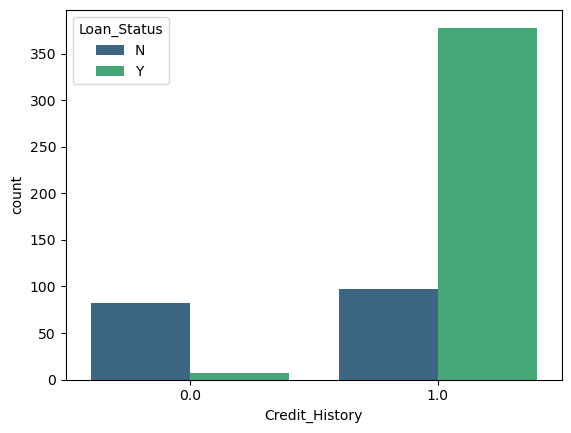

In [29]:
sns.countplot(data = loan_df, x = 'Credit_History', palette='viridis', hue = 'Loan_Status');

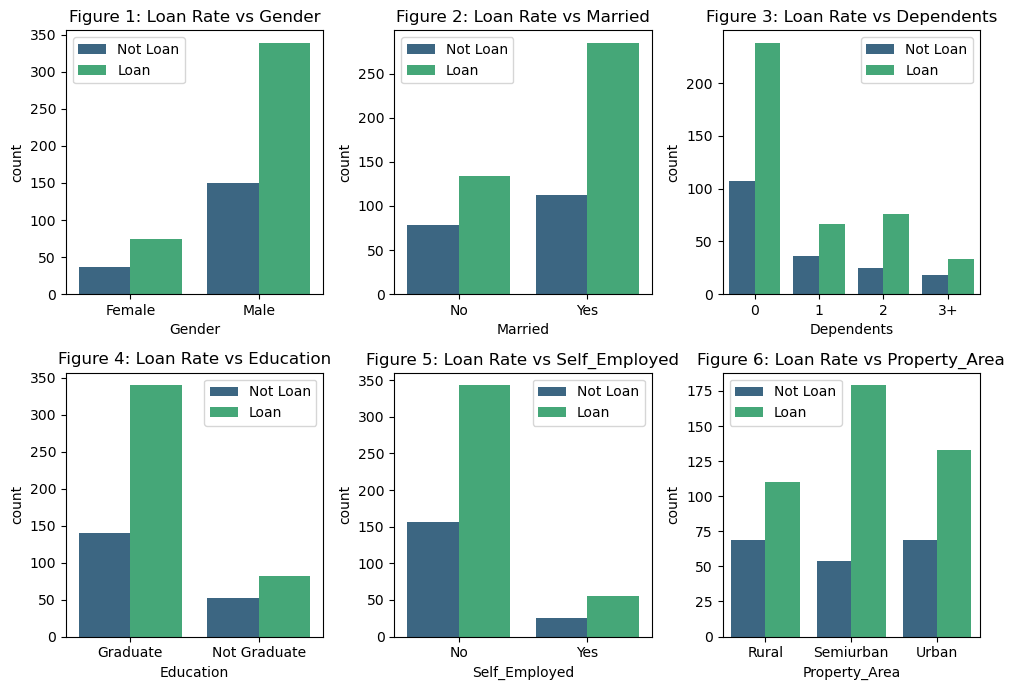

In [23]:
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (10,7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = loan_df, x = cols[i],  hue = 'Loan_Status', palette= 'viridis', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Loan Rate vs {cols[i]}")
            ax_i.legend(title='', labels={'Not Loan','Loan'})
plt.tight_layout()

## EDA for Numerical Features

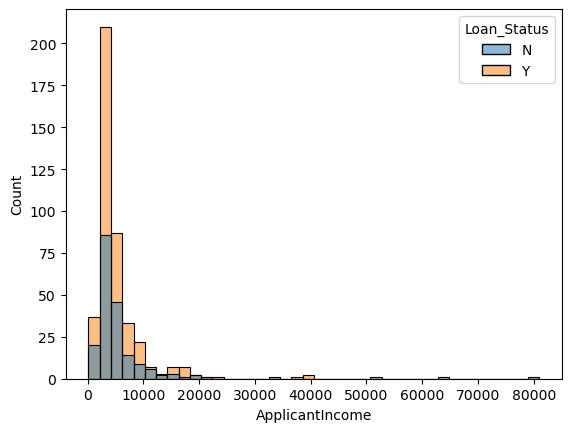

In [34]:
sns.histplot(data = loan_df, x = 'ApplicantIncome', bins = 40, hue= 'Loan_Status');

# PreProcessing Data

In [188]:
num_feature = [	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term']
cat_feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
feature_cols = num_feature + cat_feature
print(feature_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']


In [189]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>0:
            print(f'{col} has {missing_count*100/n_rows:.2f}% missing values.. ')
display_missing(loan_df, feature_cols)

LoanAmount has 3.58% missing values.. 
Loan_Amount_Term has 2.28% missing values.. 
Gender has 2.12% missing values.. 
Married has 0.49% missing values.. 
Dependents has 2.44% missing values.. 
Self_Employed has 5.21% missing values.. 
Credit_History has 8.14% missing values.. 


In [190]:
X = loan_df[feature_cols]
y =loan_df['Loan_Status']

In [191]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_transform = Pipeline(steps=[
    ( 'imputer', SimpleImputer(strategy='median')),
    ( 'scaler', StandardScaler())
])
cat_transform = Pipeline(steps=[
    ('convert', FunctionTransformer(lambda x: x.astype(str), validate=False)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [192]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transform, num_feature),
    ('cat', cat_transform, cat_feature)
])

In [193]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term']),
                                ('cat',
                                 Pipeline(steps=[('convert',
                                                  FunctionTransformer(func=<function <lambda> at 0x00000261764DD760>)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed', 'Property_Area',
                                  'Credit_History'])])

In [194]:
X = preprocessor.transform(X)

In [352]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state= 0)

In [353]:
svc_model = SVC(kernel='linear')

In [354]:
svc_model.fit(X_train,y_train)

SVC(kernel='linear')

In [355]:
y_pred_train = svc_model.predict(X_train)
training_data_acc = accuracy_score(y_pred_train, y_train)
print('Accuracy score of training data: ', training_data_acc)

Accuracy score of training data:  0.8044806517311609


In [356]:
y_pred_test = svc_model.predict(X_valid)
test_data_acc = accuracy_score(y_pred_test, y_valid)
print('Accuracy score of test data: ', test_data_acc)

Accuracy score of test data:  0.8292682926829268
